<a href="https://colab.research.google.com/github/Swanimadhoop/DEEP_LEARNING-/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python program to implement a generative adversarial network using pytorch which generates handwritten digits using mnist dataset.

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 536kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.60MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.51MB/s]


Epoch [1/50] | D Loss: 0.7307 | G Loss: 1.4473
Epoch [2/50] | D Loss: 0.1392 | G Loss: 3.5081
Epoch [3/50] | D Loss: 0.2560 | G Loss: 2.2653
Epoch [4/50] | D Loss: 0.4690 | G Loss: 1.7548
Epoch [5/50] | D Loss: 0.2005 | G Loss: 2.5277
Epoch [6/50] | D Loss: 0.2367 | G Loss: 2.1382
Epoch [7/50] | D Loss: 0.2416 | G Loss: 2.1598
Epoch [8/50] | D Loss: 0.3410 | G Loss: 1.5602
Epoch [9/50] | D Loss: 0.3199 | G Loss: 2.2678
Epoch [10/50] | D Loss: 0.4326 | G Loss: 1.0570


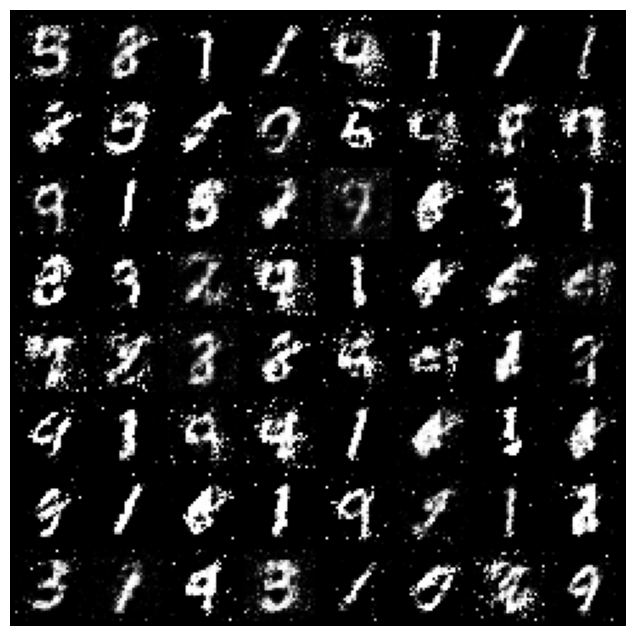

Epoch [11/50] | D Loss: 0.3761 | G Loss: 1.4924
Epoch [12/50] | D Loss: 0.4535 | G Loss: 2.7443
Epoch [13/50] | D Loss: 0.3279 | G Loss: 1.3990
Epoch [14/50] | D Loss: 0.4794 | G Loss: 1.8605
Epoch [15/50] | D Loss: 0.4874 | G Loss: 1.1023
Epoch [16/50] | D Loss: 0.4463 | G Loss: 1.6191
Epoch [17/50] | D Loss: 0.4657 | G Loss: 1.4430
Epoch [18/50] | D Loss: 0.4868 | G Loss: 1.9862
Epoch [19/50] | D Loss: 0.4279 | G Loss: 1.8399
Epoch [20/50] | D Loss: 0.4512 | G Loss: 1.4013


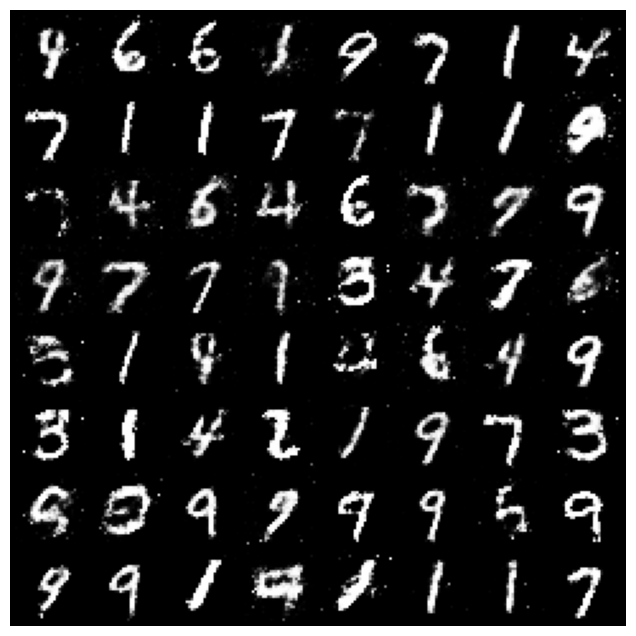

Epoch [21/50] | D Loss: 0.4034 | G Loss: 2.0906
Epoch [22/50] | D Loss: 0.3796 | G Loss: 1.5341
Epoch [23/50] | D Loss: 0.4413 | G Loss: 1.5648
Epoch [24/50] | D Loss: 0.4177 | G Loss: 1.5633
Epoch [25/50] | D Loss: 0.4284 | G Loss: 1.9681
Epoch [26/50] | D Loss: 0.4603 | G Loss: 1.6717
Epoch [27/50] | D Loss: 0.3984 | G Loss: 1.5125
Epoch [28/50] | D Loss: 0.5512 | G Loss: 1.1866
Epoch [29/50] | D Loss: 0.4308 | G Loss: 2.2168
Epoch [30/50] | D Loss: 0.4076 | G Loss: 2.2230


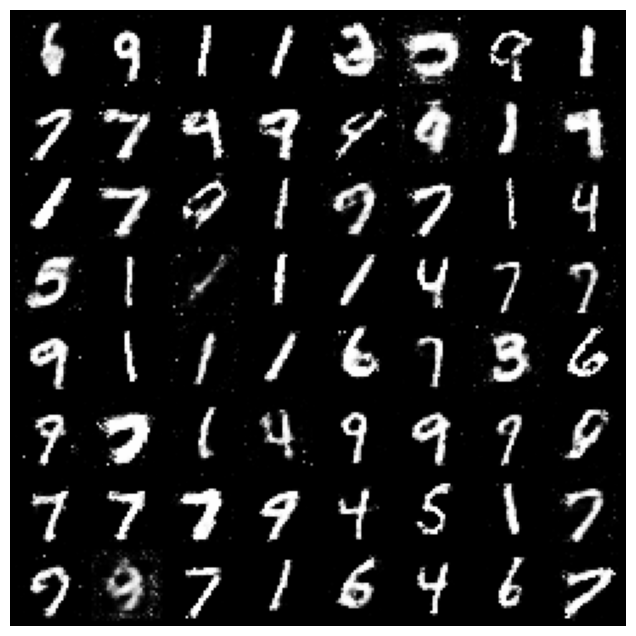

Epoch [31/50] | D Loss: 0.4424 | G Loss: 2.0404
Epoch [32/50] | D Loss: 0.5238 | G Loss: 2.2817
Epoch [33/50] | D Loss: 0.4341 | G Loss: 1.8026
Epoch [34/50] | D Loss: 0.4444 | G Loss: 1.7903
Epoch [35/50] | D Loss: 0.3538 | G Loss: 1.6047
Epoch [36/50] | D Loss: 0.4938 | G Loss: 1.6922
Epoch [37/50] | D Loss: 0.4184 | G Loss: 1.3204
Epoch [38/50] | D Loss: 0.4984 | G Loss: 1.2297
Epoch [39/50] | D Loss: 0.4547 | G Loss: 1.6062
Epoch [40/50] | D Loss: 0.3727 | G Loss: 1.8516


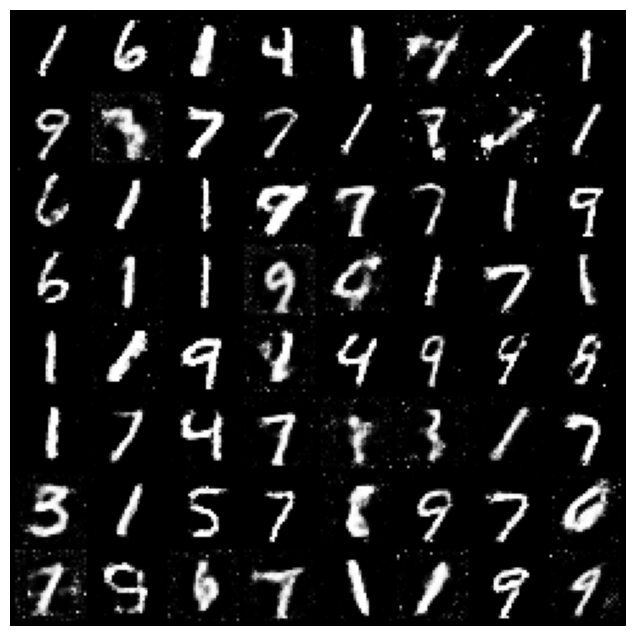

Epoch [41/50] | D Loss: 0.4662 | G Loss: 1.5673
Epoch [42/50] | D Loss: 0.4204 | G Loss: 1.4727
Epoch [43/50] | D Loss: 0.4298 | G Loss: 1.4672
Epoch [44/50] | D Loss: 0.3824 | G Loss: 1.4780
Epoch [45/50] | D Loss: 0.3761 | G Loss: 1.5140
Epoch [46/50] | D Loss: 0.4412 | G Loss: 1.3852
Epoch [47/50] | D Loss: 0.4133 | G Loss: 1.4601
Epoch [48/50] | D Loss: 0.4341 | G Loss: 1.3006
Epoch [49/50] | D Loss: 0.4023 | G Loss: 1.5837
Epoch [50/50] | D Loss: 0.4121 | G Loss: 1.0308


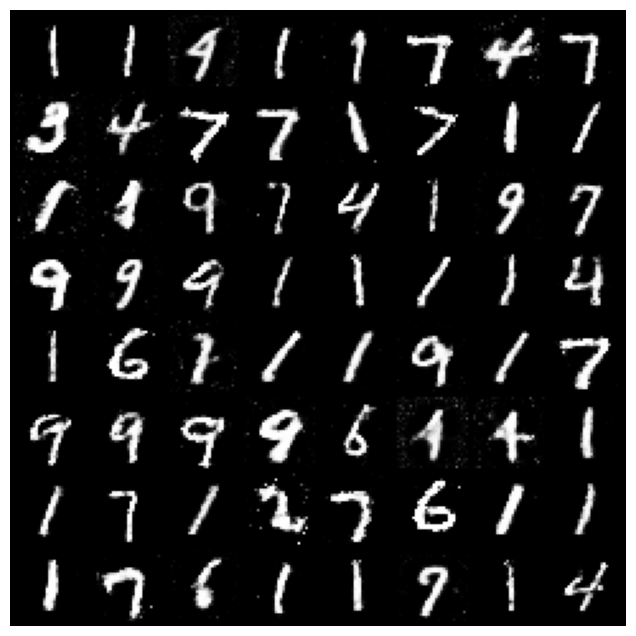

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
latent_dim = 100
hidden_dim = 256
image_size = 28*28
batch_size = 128
num_epochs = 50
learning_rate = 0.0002

# Transform for MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # scale to [-1,1]
])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# ---------------------------
# Generator Network
# ---------------------------
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim*2),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim*2, hidden_dim*4),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim*4, image_size),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(z.size(0), 1, 28, 28)  # reshape to image
        return img

# ---------------------------
# Discriminator Network
# ---------------------------
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, hidden_dim*4),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim*4, hidden_dim*2),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim*2, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity

# Initialize generator and discriminator
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

# ---------------------------
# Training Loop
# ---------------------------
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):

        # Move data to GPU if available
        real_imgs = imgs.to(device)
        batch_size_curr = real_imgs.size(0)

        # Labels: real=1, fake=0
        real_labels = torch.ones(batch_size_curr, 1).to(device)
        fake_labels = torch.zeros(batch_size_curr, 1).to(device)

        # ---------------------
        # Train Discriminator
        # ---------------------
        z = torch.randn(batch_size_curr, latent_dim).to(device)
        fake_imgs = generator(z).detach()
        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs), fake_labels)
        d_loss = (real_loss + fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # ---------------------
        # Train Generator
        # ---------------------
        z = torch.randn(batch_size_curr, latent_dim).to(device)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), real_labels)  # want D to classify as real

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # Show generated samples every 10 epochs
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(64, latent_dim).to(device)
            samples = generator(z).cpu()
            grid = make_grid(samples, nrow=8, normalize=True)
            plt.figure(figsize=(8,8))
            plt.imshow(grid.permute(1,2,0).squeeze())
            plt.axis("off")
            plt.show()
